# pMELTS
  
Versions of MELTS implemented are:  
- MELTS v. 1.0.2 ➞ (rhyolite-MELTS, Gualda et al., 2012)  
- MELTS v. 1.1.0 ➞ (rhyolite-MELTS + new CO<sub>2</sub>, works at the ternary minimum)  
- MELTS v. 1.2.0 ➞ (rhyolite-MELTS + new H<sub>2</sub>O + new CO<sub>2</sub>)  
- pMELTS v. 5.6.1

## Initialize tools and packages that are required to execute this notebook.

In [10]:
from thermoengine import equilibrate
import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy
%matplotlib inline

## Create a pMELTS v 5.6.1 instance.
Rhyolite-MELTS version 1.0.2 is the default model.

In [11]:
melts = equilibrate.MELTSmodel(version="5.6.1")

### Optional: Generate some information about the implemented model.

In [12]:
oxides = melts.get_oxide_names()
phases = melts.get_phase_names()
print (oxides)
#print (phases)

['SiO2', 'TiO2', 'Al2O3', 'Fe2O3', 'Cr2O3', 'FeO', 'MnO', 'MgO', 'NiO', 'CoO', 'CaO', 'Na2O', 'K2O', 'P2O5', 'H2O']


## Required: Input initial composition of the system (liquid), in wt% or grams of oxides. 


In [13]:
#Fe2O3 Calc 
def Fe2O3Calc(FeOwt, Fe3FeT_ratio):
    FeO = FeOwt * (1 - Fe3FeT_ratio)
    Fe2O3 = FeOwt * (Fe3FeT_ratio) * 1.11 # 1.11 converts for molar mass diferences
    return FeO, Fe2O3

In [30]:
# Workman and Hart Depleted MORB Mantle

melt_composition = {'SiO2':  44.7, 
                   'TiO2':   0.13, 
                   'Al2O3':  3.98, 
                   #'Fe2O3':  Fe2O3,#  # Need to calcuate ferric iron for models to run properly Assumed 4%
                   'Cr2O3':  0.57, 
                   'FeO':    8.18, # Total Feo 8.18 wt% 
                   'MnO':    0.0, #0.13 Excluded for modeling
                   'MgO':   38.73, 
                   #'NiO':    0.0, #0.24 Excluded 
                   #'CoO':    0.0,
                   'CaO':    3.17, 
                   'Na2O':   0.28, 
                   'K2O':    0.006, #0.006
                   #'P2O5':   0.0, # 0.019
                   #'H2O':    0.011,
                   }

def set_melt_composition(comp_dict_init, Fe3FeT_ratio, H2O_wt, melts_object = melts):
    # Assumes all iron is input as FeO modify this if needed
    comp_dict = deepcopy(comp_dict_init)
    FeO, Fe2O3 = Fe2O3Calc(comp_dict['FeO'],Fe3FeT_ratio) 
    comp_dict.update([("FeO",FeO), ("Fe2O3", Fe2O3), ("H2O",H2O_wt)])
    # Set bulk composition in Melts
    melts_object.set_bulk_composition(comp_dict) # 0.011 Water included 110 ppm

In [31]:
set_melt_composition(melt_composition, Fe3FeT_ratio=0.1, H2O_wt=0.011)

In [32]:
# # Grand Canyon Xenolith not GCB (Low CPX)
# feasible1 = melts.set_bulk_composition({'SiO2':  44.78, 
#                                        'TiO2':   0.02, 
#                                        'Al2O3':  1.43, 
#                                        'Fe2O3':  0.89,
#                                        'Cr2O3':  0.41, 
#                                        'FeO':    6.62, 
#                                        'MnO':    0.0,
#                                        'MgO':   43.09, 
#                                        'NiO':    0.0, 
#                                        'CoO':    0.0,
#                                        'CaO':    1.71, 
#                                        'Na2O':   0.04, 
#                                        'K2O':    0.00, 
#                                        'P2O5':   0.0, 
#                                        'H2O':    0.03, })

In [33]:
# # Grand Canyon Xenolith not GCB (higher CPX)
# feasible = melts.set_bulk_composition({'SiO2':  44.98, 
#                                        'TiO2':   0.03, 
#                                        'Al2O3':  2.48, 
#                                        'Fe2O3':  0.95,
#                                        'Cr2O3':  0.41, 
#                                        'FeO':    6.85, 
#                                        'MnO':    0.0,
#                                        'MgO':   40.81, 
#                                        'NiO':    0.0, 
#                                        'CoO':    0.0,
#                                        'CaO':    2.6, 
#                                        'Na2O':   0.12, 
#                                        'K2O':    0.00, 
#                                        'P2O5':   0.0, 
#                                        'H2O':    0.9, })

## Optional: Suppress phases that are not required in the simulation.

In [34]:
b = melts.get_phase_inclusion_status()
melts.set_phase_inclusion_status({'Actinolite':False, 'Aegirine':False, \
                                  'Aenigmatite':False, 'Akermanite':False, 'Andalusite':False, \
                                  'Anthophyllite':False, 'Apatite':True, 'Biotite':False, 'Chromite':False, \
                                  'Coesite':False, 'Corundum':False, 'Cristobalite':False, 'Cummingtonite':False, \
                                  'Fayalite':False, 'Forsterite':False, 'Gehlenite':False, 'Hematite':False, \
                                  'Hornblende':False, 'Ilmenite':False, 'Ilmenite ss':False, 'Kalsilite':False, \
                                  'Kalsilite ss':False, 'Kyanite':False, 'Leucite':False, 'Lime':False, \
                                  'Liquid Alloy':False, 'Magnetite':False, 'Melilite':False, 'Muscovite':False, \
                                  'Nepheline':False, 'Nepheline ss':False, 'OrthoOxide':False, 'Panunzite':False, \
                                  'Periclase':False, 'Perovskite':False, 'Phlogopite':False, 'Quartz':False, \
                                  'Rutile':False, 'Sanidine':False, 'Sillimanite':False, 'Solid Alloy':False, \
                                  'Sphene':False, 'Tridymite':False, 'Whitlockite':False})

a = melts.get_phase_inclusion_status()
for phase in b.keys():
    if b[phase] != a[phase]:
        print ("{0:<15s} Before: {1:<5s} After: {2:<5s}".format(phase, repr(b[phase]), repr(a[phase])))

## Compute the equilibrium state at some specified T (°C) and P (MPa).
Print status of the calculation.

In [35]:
# output = melts.equilibrate_tp(800,1200.0, initialize=True)
# (status, t, p, xmlout) = output[0]
# print (status, t, p)

In [36]:
# output = melts.equilibrate_tp(1427.0,3000.0, initialize=True)
# (status, t, p, xmlout) = output[0]
# print (status, t, p)

In [37]:
output = melts.equilibrate_tp(1427.0,3000.0, initialize=True)
(status, t, p, xmlout) = output[0]
print (status, t, p)

success, Optimal residual norm. 1427.0 3000.0


### Summary output of equilibrium state ...

In [38]:
melts.output_summary(xmlout)

T (°C)      1427.00
P (MPa)     3000.00
Spinel            2.1242 (g)  Fe''0.28Mg0.74Fe'''0.35Al0.99Cr0.62Ti0.02O4                 
Orthopyroxene    19.7087 (g)  Na0.02Ca0.07Fe''0.14Mg1.68Fe'''0.03Ti0.01Al0.14Si1.92O6     
Garnet            7.9555 (g)  (Ca0.16Fe''0.13Mg0.71)3Al2Si3O12                            
Olivine          55.3689 (g)  (Ca0.00Mg0.91Fe''0.09Mn0.00Co0.00Ni0.00)2SiO4               
Liquid            0.5380 (g)  wt%:SiO2 40.20 TiO2  1.08 Al2O3  8.71 Fe2O3  3.52 Cr2O3  0.16 FeO 11.35 MnO  0.00 MgO
                                  19.57 NiO  0.00 CoO  0.00 CaO  4.44 Na2O  7.81 K2O  1.12 P2O5  0.00 H2O  2.04
Augite           14.1517 (g)  Na0.09Ca0.59Fe''0.10Mg1.03Fe'''0.06Ti0.01Al0.22Si1.89O6     


## Compute the equilibrium state at some specified S (J/K) and P (MPa).

In [39]:
s = melts.get_property_of_phase(xmlout,'System', 'Entropy')
print ("{0:<20s} {1:13.6e} {2:<10s}".format('Entropy', s, melts.get_units_of_property('Entropy')))
output = melts.equilibrate_sp(s, p, initialize=True)
(status, t, p, xmlout) = output[0]
melts.output_summary(xmlout)

Entropy               2.572636e+02 J/K       
T (°C)      1427.00
P (MPa)     3000.00
Spinel            2.1242 (g)  Fe''0.28Mg0.74Fe'''0.35Al0.99Cr0.62Ti0.02O4                 
Orthopyroxene    19.7087 (g)  Na0.02Ca0.07Fe''0.14Mg1.68Fe'''0.03Ti0.01Al0.14Si1.92O6     
Garnet            7.9555 (g)  (Ca0.16Fe''0.13Mg0.71)3Al2Si3O12                            
Olivine          55.3689 (g)  (Ca0.00Mg0.91Fe''0.09Mn0.00Co0.00Ni0.00)2SiO4               
Liquid            0.5380 (g)  wt%:SiO2 40.20 TiO2  1.08 Al2O3  8.71 Fe2O3  3.52 Cr2O3  0.16 FeO 11.35 MnO  0.00 MgO
                                  19.57 NiO  0.00 CoO  0.00 CaO  4.44 Na2O  7.81 K2O  1.12 P2O5  0.00 H2O  2.04
Augite           14.1517 (g)  Na0.09Ca0.59Fe''0.10Mg1.03Fe'''0.06Ti0.01Al0.22Si1.89O6     


## Run the sequence of calculations along a S=constant, P path:
Output is sent to an Excel file and plotted in the notebook

success, Optimal residual norm.  1425.66  2950.00
success, Optimal residual norm.  1424.30  2900.00
success, Optimal residual norm.  1422.92  2850.00
success, Optimal residual norm.  1421.52  2800.00
success, Optimal residual norm.  1420.09  2750.00
success, Optimal residual norm.  1418.64  2700.00
success, Optimal residual norm.  1417.16  2650.00
success, Optimal residual norm.  1415.65  2600.00
success, Optimal residual norm.  1414.10  2550.00
success, Optimal residual norm.  1412.51  2500.00
success, Optimal residual norm.  1410.88  2450.00
success, Optimal residual norm.  1409.20  2400.00
success, Optimal residual norm.  1407.46  2350.00
success, Optimal residual norm.  1406.14  2300.00
success, Optimal residual norm.  1404.87  2250.00
success, Optimal residual norm.  1403.57  2200.00
success, Optimal residual norm.  1402.24  2150.00
success, Optimal residual norm.  1400.87  2100.00
success, Optimal residual norm.  1399.46  2050.00
success, Optimal residual norm.  1398.01  2000.00


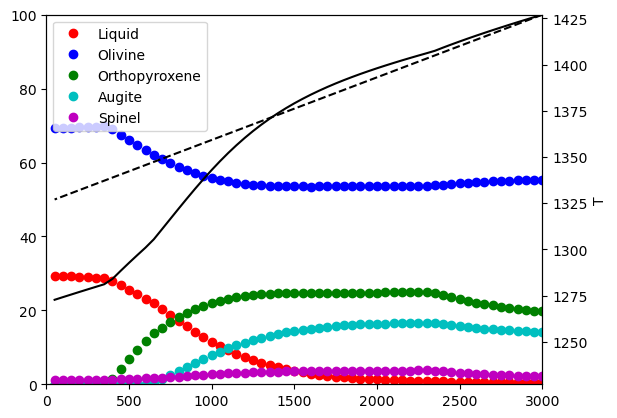

In [40]:
number_of_steps = 60
s_increment_of_steps = 0.0
p_increment_of_steps = -50.0

plotPhases = ['Liquid', 'Olivine', 'Orthopyroxene', 'Augite', 'Spinel']
# matplotlib colors b : blue, g : green, r : red, c : cyan, m : magenta, y : yellow, k : black, w : white.
plotColors = [ 'ro', 'bo', 'go', 'co', 'mo']

wb = melts.start_excel_workbook_with_sheet_name(sheetName="Summary")
melts.update_excel_workbook(wb, xmlout)

n = len(plotPhases)
xPlot = np.zeros(number_of_steps)
yPlot = np.zeros((n, number_of_steps))
y2Plot = np.linspace(t, t-100.0, number_of_steps)
y3Plot = np.linspace(t, t-100.0, number_of_steps)
xPlot[0] = p
for i in range (0, n):
    yPlot[i][0] = melts.get_property_of_phase(xmlout, plotPhases[i])
y2Plot[0] = t

plt.ion()
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim([min(p, p+p_increment_of_steps*number_of_steps), max(p, p+p_increment_of_steps*number_of_steps)])
ax.set_ylim([0., 100.])
ax2 = ax.twinx()
ax2.set_ylabel('T', color='k')
ax2.set_ylim([t-200, t])

graphs = []
for i in range (0, n):
    graphs.append(ax.plot(xPlot, yPlot[i], plotColors[i]))
graphs.append(ax2.plot(xPlot, y2Plot, 'k-'))
graphs.append(ax2.plot(xPlot, y3Plot, 'k--'))
handle = []
for (graph,) in graphs:
    handle.append(graph)
ax.legend(handle, plotPhases, loc='upper left')

for i in range (1, number_of_steps):
    output = melts.equilibrate_sp(s+s_increment_of_steps, p+p_increment_of_steps)
    (status, t, p, xmlout) = output[0]
    print ("{0:<30s} {1:8.2f} {2:8.2f}".format(status, t, p))
    xPlot[i] = p
    for j in range (0, n):
        yPlot[j][i] = melts.get_property_of_phase(xmlout, plotPhases[j])
    y2Plot[i] = t
    j = 0
    for (graph,) in graphs:
        graph.set_xdata(xPlot)
        if j < n:
            graph.set_ydata(yPlot[j])
        elif j == n:
            graph.set_ydata(y2Plot)
        j = j + 1
    fig.canvas.draw()
    melts.update_excel_workbook(wb, xmlout)

melts.write_excel_workbook(wb, "PMELTS_Adiabat_Batch_summary.xlsx")

In [11]:
melts.get_property_of_phase(xmlout, plotPhases[0], property_name ='Si')

0.0

In [12]:
?melts.properti

Object `melts.properti` not found.


In [13]:
melts.compositions(xmlout, plotPhases[3])

AttributeError: 'MELTSmodel' object has no attribute 'compositions'

In [14]:
melts.attribues()

AttributeError: 'MELTSmodel' object has no attribute 'attribues'

In [15]:
?melts

Type:        MELTSmodel
String form: <thermoengine.equilibrate.MELTSmodel object at 0x7fda74298400>
File:        /opt/conda/lib/python3.9/site-packages/thermoengine/equilibrate.py
Docstring:  
Class for creating an instance of the Equilibrate PhaseObjC class that is tailored to
calculate equilibrium phase assemblages using one of the MELTS calibrations.

Valid initializers are version='1.0.2', '1.1.0', '1.2.0', '5.6.1', 'DEW', 'OnlyDEW'


In [16]:
melts.get_composition_of_phase(xmlout, phase_name='Olivine', mode='component')

{'fayalite': 0.08468823926536077,
 'monticellite': 0.011179250356159954,
 'forsterite': 0.9041325103784792}

In [17]:
melts.get_composition_of_phase(xmlout, phase_name='Olivine', mode='component')

{'fayalite': 0.08468823926536077,
 'monticellite': 0.011179250356159954,
 'forsterite': 0.9041325103784792}

In [18]:
melts.get_composition_of_phase(xmlout, phase_name='Augite', mode='component')

{'diopside': 0.3982642334060611,
 'clinoenstatite': 0.30758643568624355,
 'hedenbergite': 0.10946682775198553,
 'alumino-buffonite': 0.06612953568089701,
 'buffonite': -0.06089134029293836,
 'essenite': 0.12435038774416787,
 'jadeite': 0.05509392002358334}

In [19]:
melts.get_composition_of_phase(xmlout, phase_name='Augite', mode='component')

{'diopside': 0.3982642334060611,
 'clinoenstatite': 0.30758643568624355,
 'hedenbergite': 0.10946682775198553,
 'alumino-buffonite': 0.06612953568089701,
 'buffonite': -0.06089134029293836,
 'essenite': 0.12435038774416787,
 'jadeite': 0.05509392002358334}

In [20]:
melts.get_composition_of_phase(xmlout, phase_name='Liquid', mode='component')

{}

In [21]:
melts.get_composition_of_phase(xmlout, phase_name='Liquid', mode='component')

{}

In [37]:
.256/(0.256+0.051)

0.8338762214983714

fractionate_phases() function can be used to run this melting model where CPX is formed at the same time as olivne. 